## Determination of resource utilisation by translation processes for YCM

In [38]:
import pickle as pkl
import os.path
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import collections as col

### 1. ATP/GTP consumption: from standard simulation, 3600 s

In [2]:
filename = '../../results/updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah_20160906_1752_3600s.p'

In [3]:
results = pkl.load(file(filename))

In [4]:
results.keys()

['n_tRNA',
 'description',
 'n_ribosomes',
 'timerange',
 'proteome',
 'transcriptome',
 'duration',
 'time_stamp',
 'timecourses']

In [5]:
results['n_tRNA']

2984788

In [6]:
results['description']

'updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah'

In [7]:
results['n_ribosomes']

200000

In [8]:
results['timerange']

array([  0.00000000e+00,   2.00000000e-01,   4.00000000e-01, ...,
         3.59940000e+03,   3.59960000e+03,   3.59980000e+03])

In [9]:
len(results['proteome'])

4475

In [10]:
len(results['transcriptome'])

57508

In [11]:
results['duration']

3600.799999998917

In [12]:
results['time_stamp']

'20160906_1752'

In [13]:
len(results['timecourses']['protein'])

18000

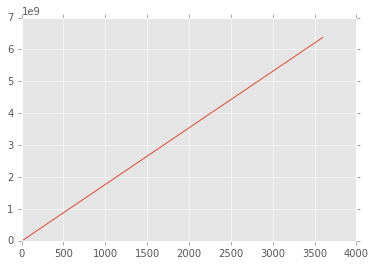

In [14]:
plt.plot(results['timerange'], results['timecourses']['protein'])

Peptide bonds per second:

In [15]:
peptide_bonds_rate = results['timecourses']['protein'][-1]/results['timerange'][-1]
peptide_bonds_rate

1772346.6470364796

In [16]:
avogadro = 6.022e23

ATP equivalents per second:

In [17]:
atp_rate = 4 * peptide_bonds_rate
atp_rate

7089386.5881459182

in mM/s:

In [18]:
atp_rate_mM_s = atp_rate * 1000 / avogadro
atp_rate_mM_s

1.1772478558860707e-14

Cell volume in litres according to http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000865

In [19]:
V = 4.2e-17 * 1000

millimolar per second:

In [20]:
atp_rate_mM_s / V

0.28029710854430256

### 2. Amino acid consumption

Exome from SGD ('yeastgenome.org')

All yeast ORFs (http://downloads.yeastgenome.org/sequence/S288C_reference/orf_dna/):
ORF Coding Sequences (CDS) only, without 5'-UTR, 3'-UTR, intron sequences, or bases not translated due to translational frameshifting, for all "Verified" and "Uncharacterized" ORFs, and transposable element genes.

Does NOT include sequences for ORFs classified as "Dubious" or "pseudogene".

In [21]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))

In [22]:
len(orf_genomic_dict)

6713

Genetic code for yeast:

In [24]:
'''
these codons are on the mRNA from 5' to 3'
'''
genetic_code = {
    'uuu': 'F', 'ucu': 'S', 'uau': 'Y', 'ugu': 'C',
    'uuc': 'F', 'ucc': 'S', 'uac': 'Y', 'ugc': 'C',
    'uua': 'L', 'uca': 'S', 'uaa': '*', 'uga': '*',  # '*'==stop
    'uug': 'L', 'ucg': 'S', 'uag': '*', 'ugg': 'W',
    'cuu': 'L', 'ccu': 'P', 'cau': 'H', 'cgu': 'R',
    'cuc': 'L', 'ccc': 'P', 'cac': 'H', 'cgc': 'R',
    'cua': 'L', 'cca': 'P', 'caa': 'Q', 'cga': 'R',
    'cug': 'L', 'ccg': 'P', 'cag': 'Q', 'cgg': 'R',
    'auu': 'I', 'acu': 'T', 'aau': 'N', 'agu': 'S',
    'auc': 'I', 'acc': 'T', 'aac': 'N', 'agc': 'S',
    'aua': 'I', 'aca': 'T', 'aaa': 'K', 'aga': 'R',
    'aug': 'M', 'acg': 'T', 'aag': 'K', 'agg': 'R',
    'guu': 'V', 'gcu': 'A', 'gau': 'D', 'ggu': 'G',
    'guc': 'V', 'gcc': 'A', 'gac': 'D', 'ggc': 'G',
    'gua': 'V', 'gca': 'A', 'gaa': 'E', 'gga': 'G',
    'gug': 'V', 'gcg': 'A', 'gag': 'E', 'ggg': 'G'
}

In [26]:
orf_genomic_dict['YAL008W']

'augacuuuggcuuuuaauaugcaacgguugguguuucguaauuugaauguugggaagcgcauguucaagaacguccccuuauggagguuuaaugucgccaauaaauuaggaaagcccuuaacucgcucuguaggguuaggcggugcuggcauaguugcugguggcuuuuacuugaugaaucgccagccuucuaaguugauauucaaugauucuuuaggggcagcugucaaacaacagggucccuuggaaccaacugugggcaacaguacggcaauuaccgaggaaaggaggaacaaaauaaguagucacaagcagauguuuuugggaucauuauucgguguuguuuuaggaguuacgguggcuaagauaucaauuuuguuuauguaugucgguauuacaagcaugcuucuuugugaaugguuacgguacaagggauggauucgcauuaauuugaaaaauaucaaaucuguaauuguuuugaaagauguagacuugaagaaacugcuuauugauggguuauuggguacagaauacauggguuuuaaaguauucuuuacauugaguuucguauuagcaaguuuaaaugcuaacaaauga'

Test translation from Biopython:

In [35]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

coding_dna = Seq("AUGGCCAuuGTA", generic_dna)
str(coding_dna.translate())

'MAIV'

In [41]:
def calculate_aa_frequency(dna_sequence):
    aa_sequence = str(Seq(dna_sequence, generic_dna).translate())
    return col.Counter(aa_sequence)

In [44]:
calculate_aa_frequency(orf_genomic_dict['YAL008W']) + calculate_aa_frequency(orf_genomic_dict['YBR255W'])

Counter({'*': 2,
         'A': 32,
         'C': 2,
         'D': 34,
         'E': 50,
         'F': 26,
         'G': 56,
         'H': 27,
         'I': 60,
         'K': 70,
         'L': 85,
         'M': 23,
         'N': 64,
         'P': 31,
         'Q': 32,
         'R': 57,
         'S': 88,
         'T': 68,
         'V': 51,
         'W': 13,
         'Y': 23})

This seems to work. We now calculate 

$$\sum_{\mathrm{genes}\  i} n_i \cdot a_{ij}$$

for all amino acids $j$.

In [50]:
molecule_counts = {key: results['timecourses'][key][-1] for key in results['timecourses']}

In [54]:
aas = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}.values()

In [55]:
freqs = col.Counter()

In [61]:
for gene in orf_genomic_dict:
    if gene in molecule_counts:
        this_gene_freq = col.Counter({aa: calculate_aa_frequency(orf_genomic_dict[gene])[aa] * molecule_counts[gene] for aa in aas})
        freqs += this_gene_freq

Counter({'A': 549830003, 'L': 525874415, 'K': 508966010, 'V': 462742213, 'E': 434606950, 'S': 432586192, 'G': 432522430, 'I': 381504466, 'T': 373201368, 'D': 352550583, 'N': 292950714, 'R': 286135169, 'P': 269961179, 'F': 248032164, 'Q': 218732058, 'Y': 196518661, 'H': 127586566, 'M': 123937666, 'W': 63022372, 'C': 59619177, '*': 4475})


In [62]:
freqs

Counter({'*': 4475,
         'A': 549830003,
         'C': 59619177,
         'D': 352550583,
         'E': 434606950,
         'F': 248032164,
         'G': 432522430,
         'H': 127586566,
         'I': 381504466,
         'K': 508966010,
         'L': 525874415,
         'M': 123937666,
         'N': 292950714,
         'P': 269961179,
         'Q': 218732058,
         'R': 286135169,
         'S': 432586192,
         'T': 373201368,
         'V': 462742213,
         'W': 63022372,
         'Y': 196518661})

In [63]:
sum(freqs.values())

6340884831

For comparison, the number of peptide bonds. (It should be comparable.)

In [66]:
results['timecourses']['protein'][-1]

6380093460

Consumption per second:

In [69]:
aa_rates = {key: freqs[key]/results['timerange'][-1] for key in aas}
aa_rates

{'A': 152739.04189126214,
 'C': 16561.802600149436,
 'D': 97936.158397718231,
 'E': 120730.86004781675,
 'F': 68901.651202865338,
 'G': 120151.79454417749,
 'H': 35442.681815667085,
 'I': 105979.35051950518,
 'K': 141387.30207237988,
 'L': 146084.34218572095,
 'M': 34429.042169019747,
 'N': 81379.719428881639,
 'P': 74993.382687949663,
 'Q': 60762.280682278404,
 'R': 79486.407300429491,
 'S': 120169.50719488031,
 'T': 103672.80626704602,
 'V': 128546.64509143264,
 'W': 17507.187065953374,
 'Y': 54591.549808339107}

in mM/s:

In [73]:
aa_rates_mM_s = {key: aa_rates[key] * 1000 / avogadro / V for key in aas}
aa_rates_mM_s

{'A': 0.0060389303463199281,
 'C': 0.00065481340640466846,
 'D': 0.003872157580843188,
 'E': 0.0047734046609976422,
 'F': 0.0027242037609268134,
 'G': 0.004750509818924953,
 'H': 0.0014013174635727366,
 'I': 0.0041901658411026711,
 'K': 0.0055901101545278381,
 'L': 0.0057758197002151217,
 'M': 0.0013612406165100877,
 'N': 0.0032175562393794836,
 'P': 0.0029650560123969912,
 'Q': 0.0024023928406271609,
 'R': 0.0031426992812239843,
 'S': 0.0047512101340671624,
 'T': 0.0040989706894974786,
 'V': 0.0050824217983043386,
 'W': 0.00069219160957257415,
 'Y': 0.0021584171454009544}

### 3. ATP/GTP consumption (cell cycle)